# 6章 ゲート付きRNN

* RNNはループする経路を持ち，過去の情報を記憶できた
* RNNの構造は単純で簡単に実装できたがRNNは性能が良くない
* 原因は時系列データの長期の依存関係をうまく学習できないから
* 現在はRNNに代わりLSTMやGRUが良く使われる
* LSTMやGRUにはゲートと呼ばれる仕組みが加わっている
  * LSTMやGRUはゲート付きRNNである
* ゲートは時系列データの長期依存関係を学習できるようになる

## RNNの問題点
* 長期の依存関係の学習が苦手な理由はBPTTで勾配消失or勾配爆発が発生するため

### 6.1.1 RNNの復習
* RNN はループする経路を持つ
* ループを展開すると横に長く伸びたネットワークとなる

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 2
H = 3
T = 20

In [3]:
dh = np.ones((N,H))
print(dh)

[[1. 1. 1.]
 [1. 1. 1.]]


In [4]:
np.random.seed(3)
Wh = np.random.randn(H,H)
print(Wh)

[[ 1.78862847  0.43650985  0.09649747]
 [-1.8634927  -0.2773882  -0.35475898]
 [-0.08274148 -0.62700068 -0.04381817]]


In [8]:
norm_list = []
for t in range(T):
    dh = np.dot(dh, Wh.T)
    norm = np.sqrt(np.sum(dh**2)) / N
    norm_list.append(norm)
    print("t = ", t)
    print("dh = ", dh)
    print("norm_list =", norm_list)

t =  0
dh =  [[ 29395.40587005 -39750.31752869  17314.17227862]
 [ 29395.40587005 -39750.31752869  17314.17227862]]
norm_list = [37040.23617358448]
t =  1
dh =  [[ 36896.82855161 -49894.21330706  21732.5812374 ]
 [ 36896.82855161 -49894.21330706  21732.5812374 ]]
norm_list = [37040.23617358448, 46492.545455898304]
t =  2
dh =  [[ 46312.54159868 -62626.73297475  27278.52533981]
 [ 46312.54159868 -62626.73297475  27278.52533981]]
norm_list = [37040.23617358448, 46492.545455898304, 58356.9924564975]
t =  3
dh =  [[ 58131.05335949 -78608.4682597   34239.74062659]
 [ 58131.05335949 -78608.4682597   34239.74062659]]
norm_list = [37040.23617358448, 46492.545455898304, 58356.9924564975, 73249.13134296138]
t =  4
dh =  [[ 72965.53477817 -98668.58749646  42977.39058735]
 [ 72965.53477817 -98668.58749646  42977.39058735]]
norm_list = [37040.23617358448, 46492.545455898304, 58356.9924564975, 73249.13134296138, 91941.59974056385]
t =  5
dh =  [[  91585.63208102 -123847.85474234   53944.80413392]
 [

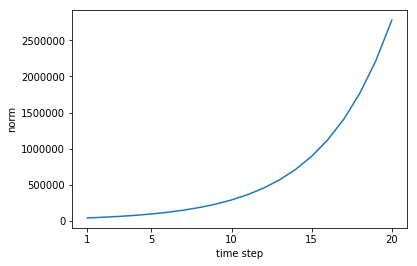

In [9]:
# グラフの描画
plt.plot(np.arange(len(norm_list)), norm_list)
plt.xticks([0, 4, 9, 14, 19], [1, 5, 10, 15, 20])
plt.xlabel('time step')
plt.ylabel('norm')
plt.show()

### 6.2.2 LSTMレイヤの組み立て

## 6.6 まとめ
* RNNでは勾配消失または勾配爆発が発生することが問題である
* RNNの勾配爆発への対策として勾配クリッピングがある
* データと勾配の流れを制御するためにゲートという仕組みがある
* ゲート付きのRNNとしてLSTMやGRUがあり，RNNの問題を解決している

* ゲート付きRNNとしてLSTMレイヤを使用して言語モデルを作成した．
  * LSTMはinput, forget, outputの3つのゲートからなる
  * ゲートはいくつかの重みがあり，sigmoidを使って0.0から1.0までの実数を出力する
* PTBデータセットを対象に学習を行い，パープレキシティ(perplexity)の評価を行なった
    * 確率の逆数であり，分岐の広がりを表す
* 精度向上のための技法としてLSTMの多層化，Dropout，重み共有などの手法がある